In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download himanshupoddar/zomato-bangalore-restaurants

Dataset URL: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
License(s): copyright-authors
  0% 0.00/89.0M [00:00<?, ?B/s]
100% 89.0M/89.0M [00:00<00:00, 1.13GB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/zomato-bangalore-restaurants.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/zomato.csv')

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df['menu_item'].unique().shape

(9098,)

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
zomato = df.drop(['url','dish_liked','phone'],axis=1)

In [ ]:
zomato.duplicated().sum()

np.int64(43)

In [ ]:
zomato.drop_duplicates(inplace=True)

In [ ]:
is_null = zomato.isnull().sum()

In [ ]:
is_null

,0
address,0
name,0
online_order,0
book_table,0
rate,7767
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),345


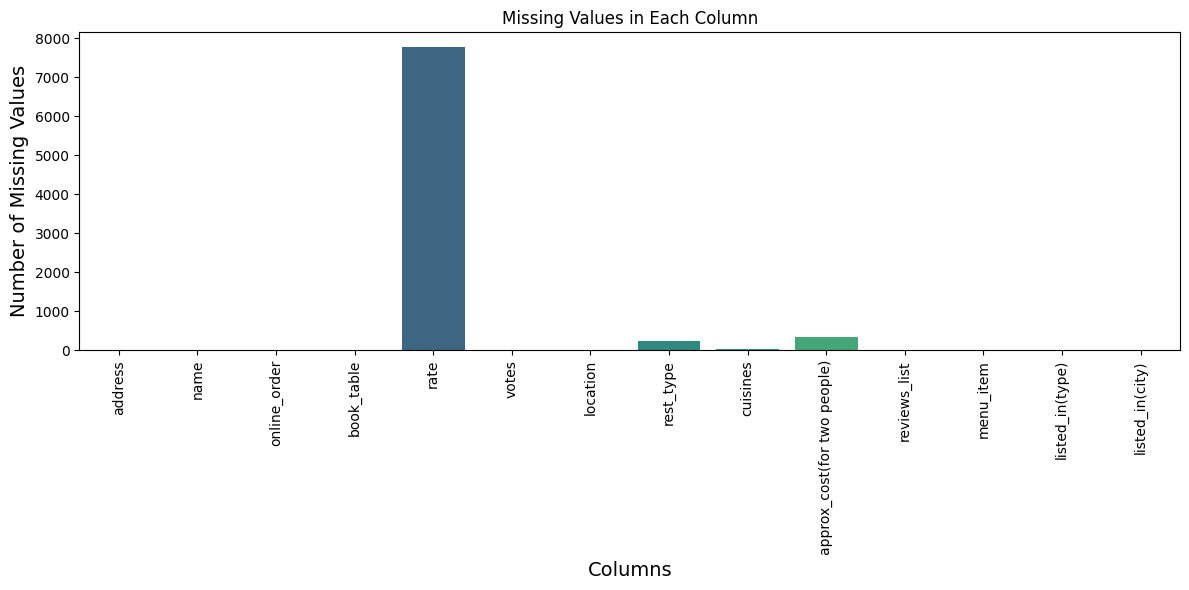

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=is_null.index, y=is_null.values, palette='viridis')
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Number of Missing Values',fontsize=14)
plt.title('Missing Values in Each Column')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
zomato.dropna(inplace=True,how='any')

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [ ]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
zomato.dtypes

,0
address,object
name,object
online_order,object
book_table,object
rate,object
votes,int64
location,object
rest_type,object
cuisines,object
cost,object


In [ ]:
zomato['cost'].unique().shape

(66,)

In [ ]:
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',',''))
zomato['cost'] = zomato['cost'].astype(float)

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [ ]:
zomato['location'].unique().shape

(92,)

In [ ]:
zomato['rate'] = zomato['rate'].str.split('/').str[0]
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')

In [ ]:
num_columns = zomato.select_dtypes(include=['number'])
col_columns = zomato.select_dtypes(include=['object'])

In [ ]:
num_columns.describe()

,rate,votes,cost
count,41237.000000,43499.000000,43499.000000
mean,3.702030,334.427435,594.881859
std,0.440034,864.661517,459.378973
min,1.800000,0.000000,40.000000
25%,3.400000,17.000000,300.000000
50%,3.700000,64.000000,450.000000
75%,4.000000,255.000000,700.000000
max,4.900000,16832.000000,6000.000000


In [ ]:
num_columns.columns

Index(['rate', 'votes', 'cost'], dtype='object')

In [ ]:
for col in df.columns:
    if df[col].nunique() < 5:
        print(f"{col}: {df[col].unique()}")
        print("-" * 50)

online_order: ['Yes' 'No']
--------------------------------------------------
book_table: ['Yes' 'No']
--------------------------------------------------


In [ ]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [ ]:
# Encode the variables
zomato_df = zomato.copy()
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato
zomato_df = Encode(zomato_df)

In [ ]:
zomato_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


In [ ]:
zomato_df['address'].unique()

array([   0,    1,    2, ..., 9429, 9430, 9431])

In [ ]:
zomato_df.shape

(43499, 14)

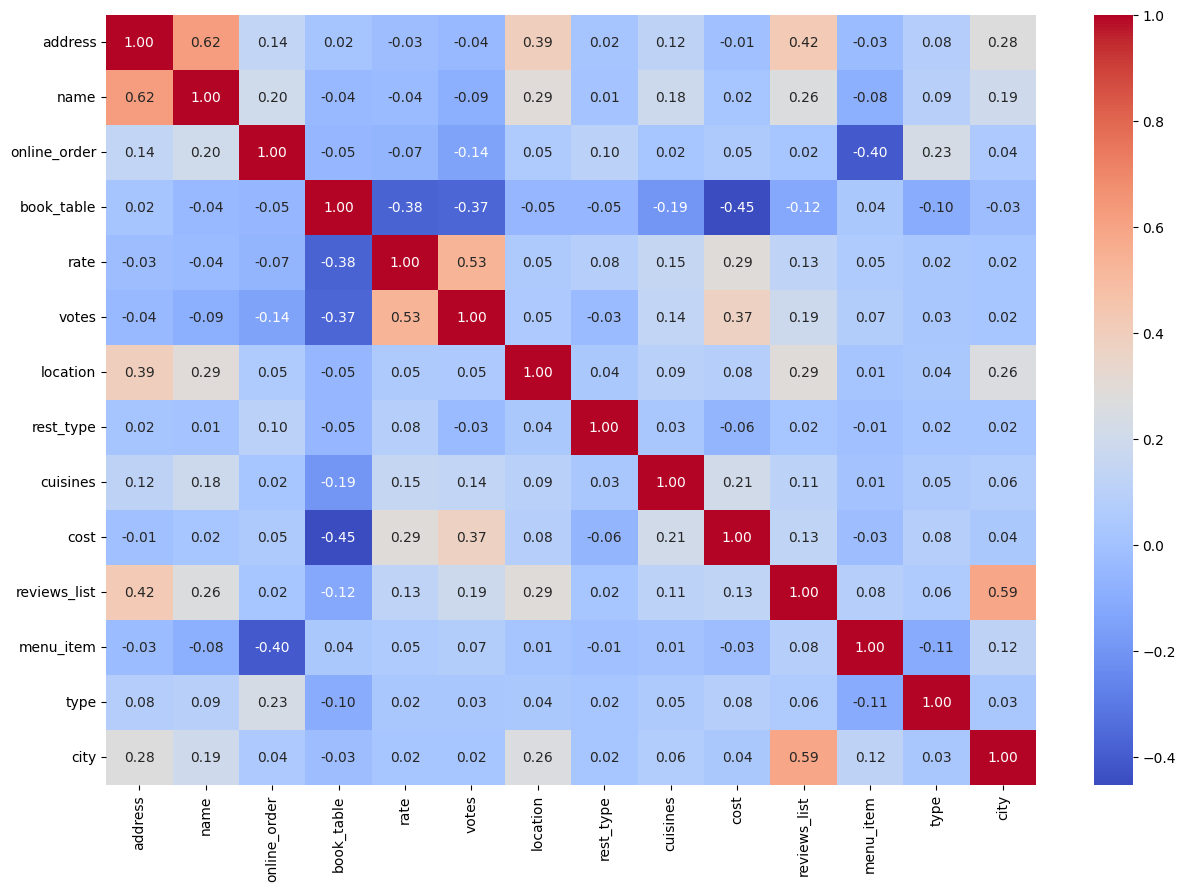

In [ ]:
# Get Correlation between different variables
corr = zomato_df.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

### Exploratory Data Analysis

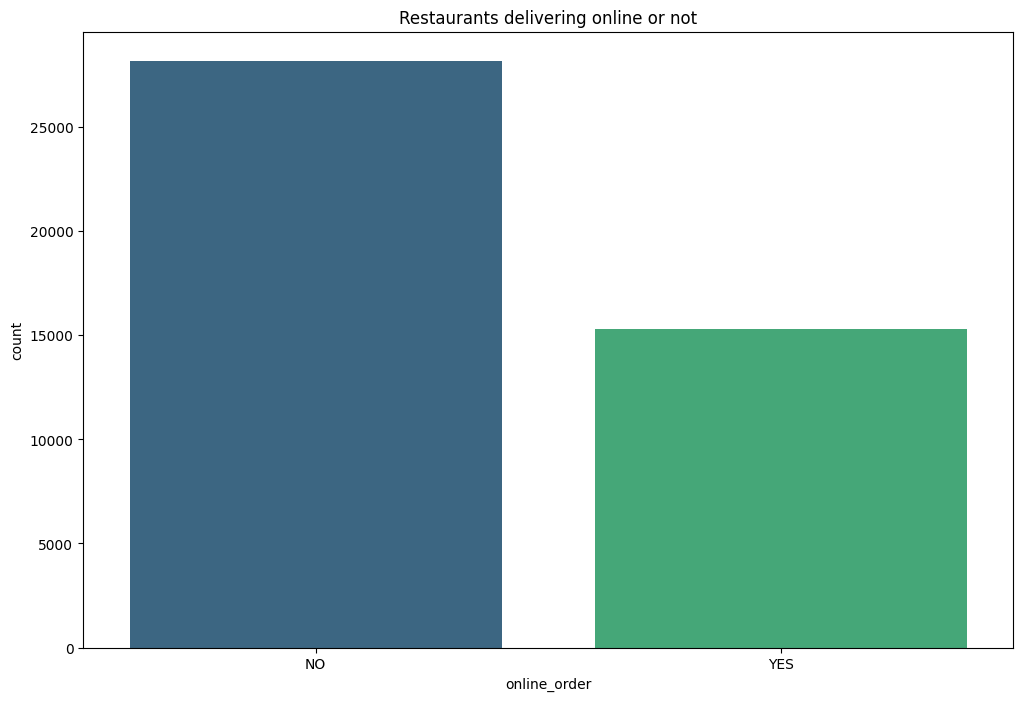

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='online_order', data=zomato_df, palette='viridis')
plt.xticks([0,1], ['NO', 'YES'])
plt.title('Restaurants delivering online or not')
plt.show()

Restaurants delivering online order

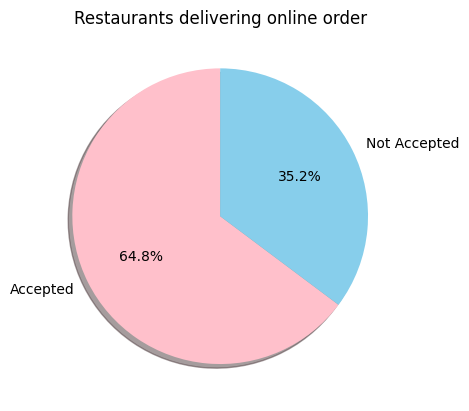

In [ ]:
data = zomato['online_order'].value_counts().values
plt.pie(data, labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%',shadow=True,startangle=90,colors=['pink','skyblue'])
plt.title('Restaurants delivering online order')
plt.show()

Restaurants taking book table

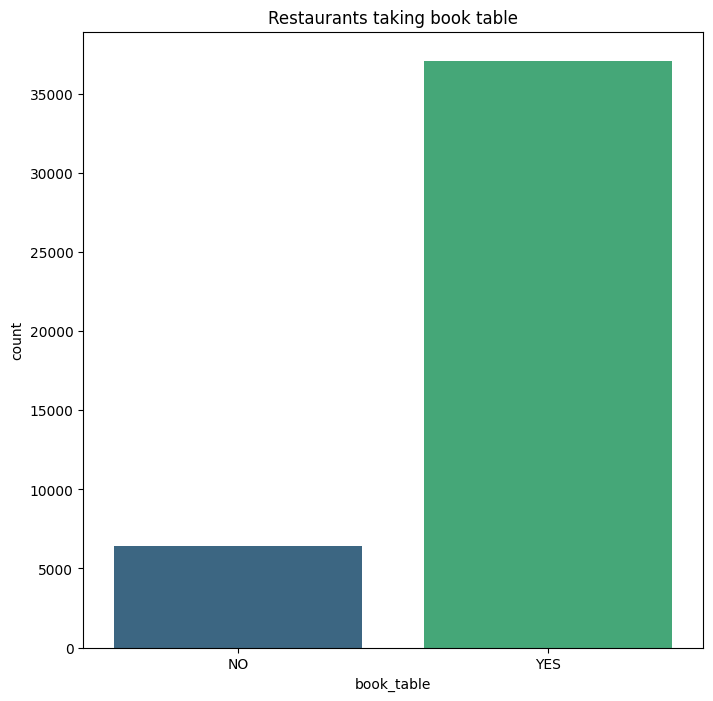

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='book_table',data=zomato_df,palette='viridis')
plt.xticks([0,1], ['NO', 'YES'])
plt.title('Restaurants taking book table')
plt.show()

Tabel booking Rate vs Normal Rate

<Figure size 1000x800 with 0 Axes>

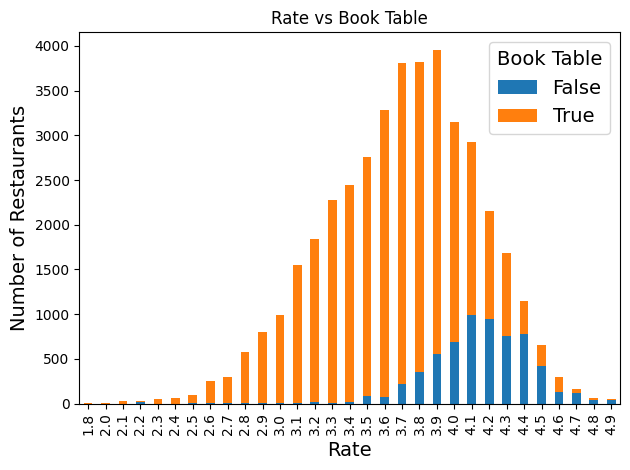

In [ ]:
ct = pd.crosstab(zomato_df['rate'], zomato_df['book_table'])
ct = ct.rename(columns={0: 'False', 1: 'True'})
plt.figure(figsize=(10, 8))
ct.plot(kind='bar', stacked=True)
plt.title('Rate vs Book Table')
plt.xlabel('Rate',fontsize=14)
plt.ylabel('Number of Restaurants',fontsize=14)
plt.legend(title='Book Table',fontsize=14,title_fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Location

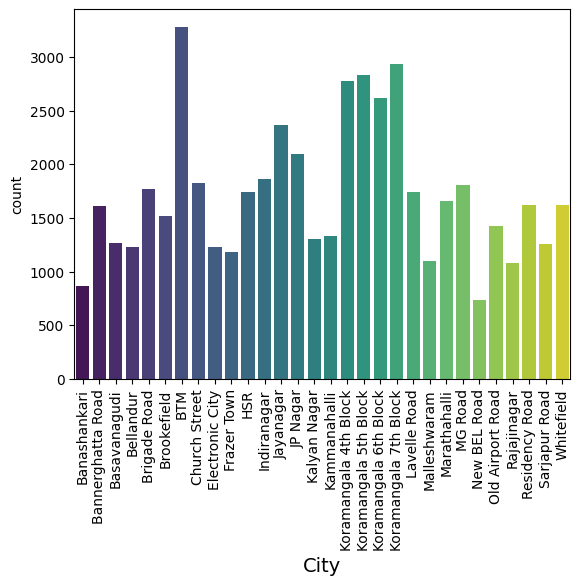

In [ ]:
sns.countplot(x='listed_in(city)',data=df,palette='viridis')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.xlabel('City',fontsize=14)
plt.show()

Type of Services

In [ ]:
zomato['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

Gaussian Rest type and Rating

In [ ]:
import plotly.express as px
loc_plt = pd.crosstab(zomato['rate'], zomato['rest_type']).reset_index()
loc_plt_melted = loc_plt.melt(id_vars='rate', var_name='Rest Type', value_name='Count')
fig = px.bar(
    loc_plt_melted,
    x='rate',
    y='Count',
    color='Rest Type',
    title='Rest type - Rating',
    labels={'rate': 'Rating', 'Count': 'Number of Restaurants'},
    barmode='stack'
)
fig.update_layout(
    title_font_size=15,
    xaxis_title='Rating',
    yaxis_title='Number of Restaurants',
    legend_title='Rest Type',
    font=dict(size=12)
)
fig.show()

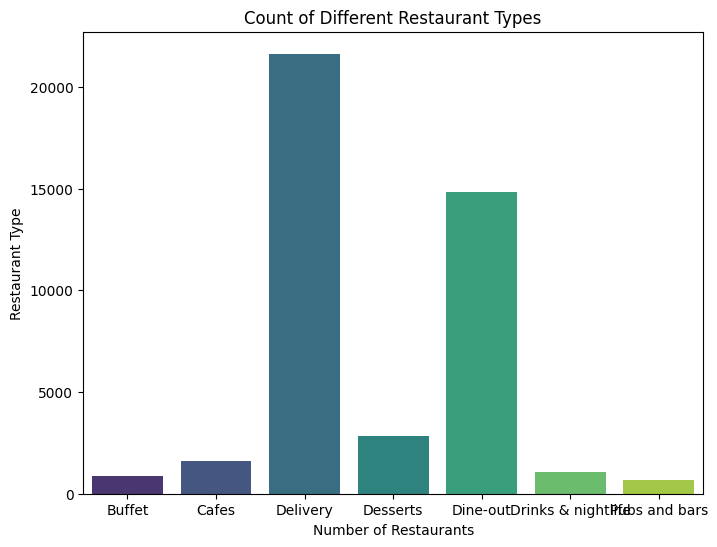

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=zomato['type'],palette='viridis')
plt.title('Count of Different Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

<Figure size 1200x800 with 0 Axes>

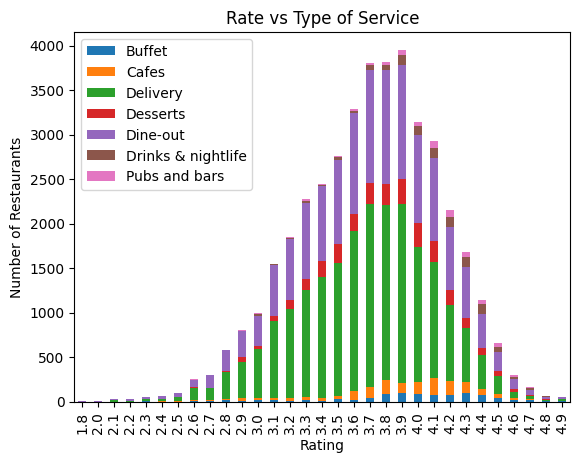

In [ ]:
plt.figure(figsize=(12, 8))
pd.crosstab(zomato['rate'], zomato['type']).plot(kind='bar', stacked=True)
plt.title('Rate vs Type of Service')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.legend()
plt.show()

No. of Restaurants in a Location

In [ ]:
location_counts = zomato['location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

fig = px.bar(
    location_counts,
    x='Location',
    y='Count',
    color='Location',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Number of Restaurants by Location (Descending Order)'
)

# Customize layout
fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Number of Restaurants',
    title_font_size=16,
    xaxis_tickangle=-90,  # rotate x labels
    showlegend=False,
    height=600,
    width=1200
)

# Show figure
fig.show()


Restaurant type

In [ ]:
rest_type = zomato['rest_type'].value_counts().reset_index()
rest_type.columns = ['rest_type', 'Count']

fig = px.bar(
    rest_type,
    x='rest_type',
    y='Count',
    color='rest_type',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Type of Restaurants'
)

fig.update_layout(
    xaxis_title='Type of Restaurants',
    yaxis_title='Number of Restaurants',
    title_font_size=16,
    xaxis_tickangle=-90,
    showlegend=False,
    height=600,
    width=1200
)

# Show figure
fig.show()

### Most Popular cuisines in Bangalore

In [ ]:
cuisines_in_bangalore = df['cuisines'].dropna()
dataframe_cuisines = cuisines_in_bangalore.str.split(',').explode().str.strip()
top_20_cuisines_in_bangalore = dataframe_cuisines.value_counts().sort_values(ascending=False).head(20)
top_20_cuisines_in_bangalore_name = ','.join(top_20_cuisines_in_bangalore.index)

In [ ]:
top_20_cuisines_in_bangalore_name

'North Indian,Chinese,South Indian,Fast Food,Biryani,Continental,Desserts,Cafe,Beverages,Italian,Bakery,Street Food,Pizza,Burger,Seafood,Ice Cream,Andhra,Mughlai,Rolls,American'

In [ ]:
top_20_cuisines_in_bangalore = pd.DataFrame(top_20_cuisines_in_bangalore)

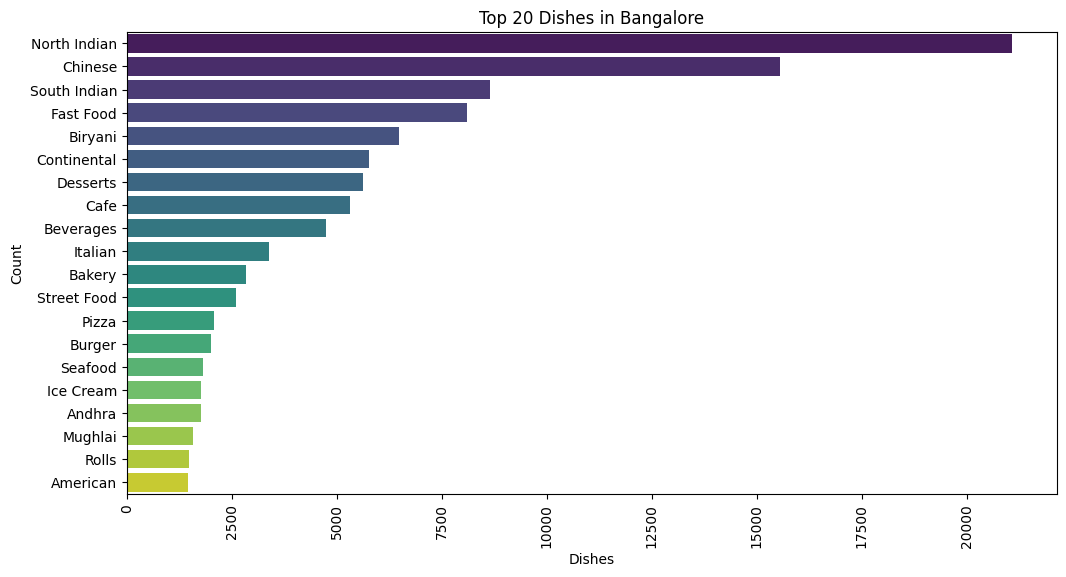

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_cuisines_in_bangalore,y=top_20_cuisines_in_bangalore.index,x=top_20_cuisines_in_bangalore['count'],palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Dishes')
plt.ylabel('Count')
plt.title('Top 20 Dishes in Bangalore')
plt.show()

Most famous Restaurant chains in Bengaluru

In [ ]:
import pandas as pd
import plotly.express as px
rest_type = zomato['name'].value_counts().reset_index()
rest_type.columns = ['rest_type', 'Count']
rest_type_top50 = rest_type.head(20)

fig = px.bar(
    rest_type_top50,
    x='Count',
    y='rest_type',
    color='rest_type',
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Top 50 Types of Restaurants'
)

fig.update_layout(
    xaxis_title='Type of Restaurants',
    yaxis_title='Number of Restaurants',
    title_font_size=18,
    showlegend=False,
    height=600,
    width=1200
)

fig.show()


In [ ]:
dish_liked_in_bangalore = df['dish_liked'].dropna()
dataframe_dish_liked= dish_liked_in_bangalore.str.split(',').explode().str.strip()
top_20_dishes_in_bangalore = dataframe_dish_liked.value_counts().sort_values(ascending=False).head(20)
top_20_dishes_in_bangalore_name = ','.join(top_20_dishes_in_bangalore.index)

In [ ]:
top_20_dishes_in_bangalore_name

'Pasta,Burgers,Cocktails,Pizza,Biryani,Coffee,Mocktails,Sandwiches,Paratha,Noodles,Salads,Fish,Nachos,Chicken Biryani,Beer,Mutton Biryani,Tea,Thali,Rolls,Waffles'

In [ ]:
dish_liked_in_bangalore_top_20 = pd.DataFrame(top_20_dishes_in_bangalore)

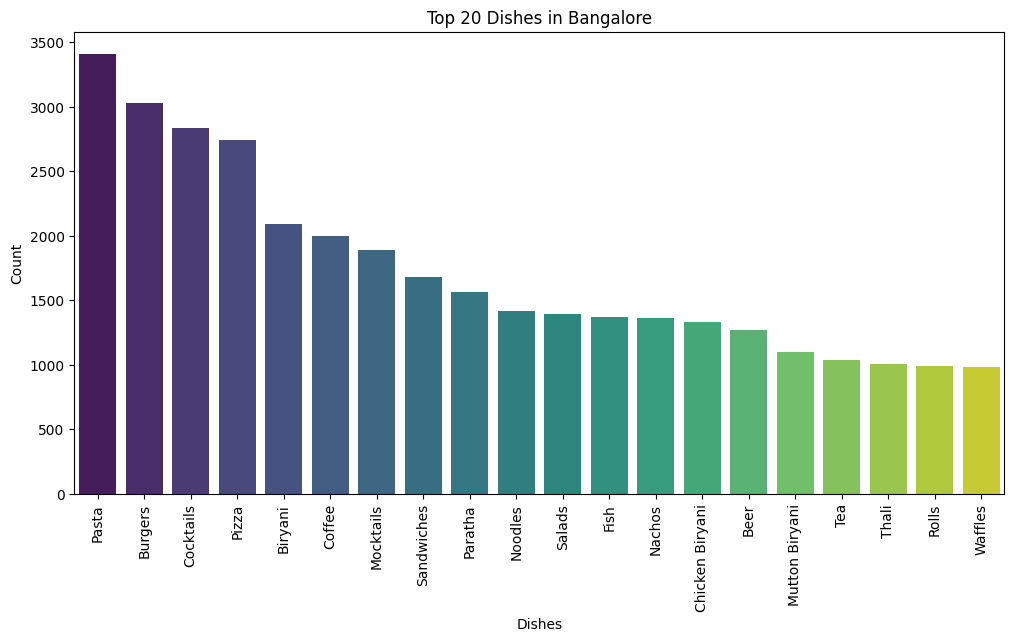

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dish_liked_in_bangalore_top_20,x=dish_liked_in_bangalore_top_20.index,y=dish_liked_in_bangalore_top_20['count'],palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Dishes')
plt.ylabel('Count')
plt.title('Top 20 Dishes in Bangalore')
plt.show()

In [ ]:
df_location = df['location'].dropna().unique()

new_dataframe = pd.DataFrame({
    'location': df_location,
    'dish_liked': [''] * len(df_location),
    'count_location': [0] * len(df_location)
})

for location_data in df_location:
    m = df[df['location'] == location_data]
    new_dataframe.loc[new_dataframe['location'] == location_data, 'count_location'] = len(m)
    k = m['dish_liked'].dropna()
    p = k.str.split(',').explode().str.strip()
    j = p.value_counts().head(10)
    s = ', '.join(j.index)
    new_dataframe.loc[new_dataframe['location'] == location_data, 'dish_liked'] = s


In [ ]:
new_dataframe_sort = new_dataframe.sort_values('count_location', ascending=False).reset_index(drop=True)

In [ ]:
new_dataframe_sort_top20 = new_dataframe_sort.head(20)
new_dataframe_sort_top20

,location,dish_liked,count_location
0,BTM,"Paratha, Biryani, Burgers, Butter Chicken, Pas...",5124
1,HSR,"Burgers, Chicken Biryani, Pasta, Pizza, Parath...",2523
2,Koramangala 5th Block,"Burgers, Pasta, Cocktails, Pizza, Noodles, Moc...",2504
3,JP Nagar,"Pasta, Coffee, Pizza, Cocktails, Mocktails, Ch...",2235
4,Whitefield,"Pasta, Pizza, Burgers, Cocktails, Paratha, Moc...",2144
5,Indiranagar,"Cocktails, Pasta, Pizza, Burgers, Sandwiches, ...",2083
6,Jayanagar,"Pasta, Coffee, Biryani, Burgers, Pizza, Nachos...",1926
7,Marathahalli,"Paratha, Biryani, Cocktails, Mocktails, Thali,...",1846
8,Bannerghatta Road,"Chicken Biryani, Biryani, Coffee, Pasta, Frenc...",1630
9,Bellandur,"Pasta, Cocktails, Lassi, Paratha, Biryani, Bur...",1286


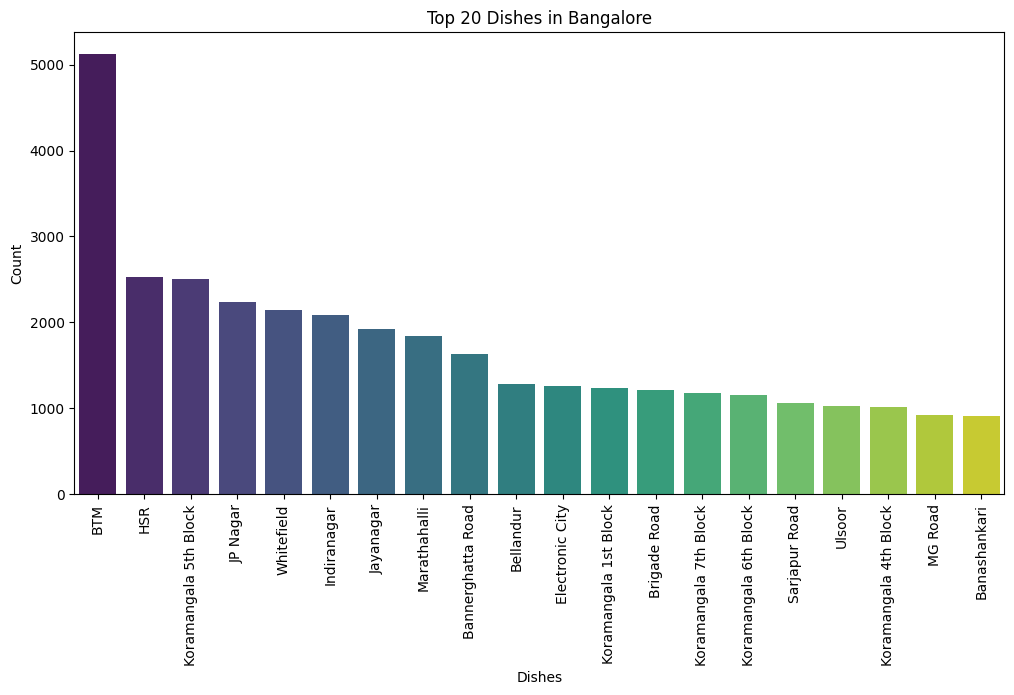

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=new_dataframe_sort_top20,x='location',y='count_location',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('No of order')
plt.title('Top 20 location in Bangalore')
plt.show()